In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [3]:
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])

clf.predict_proba(X[:2, :])
clf.score(X, y)


c:\users\devin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9733333333333334

In [3]:
matchesData = pd.read_csv("CMWRLP1_ChampStrength_ChampWR.csv")
mapping = {'Win': 1, 'Fail': 0}

matchesData = matchesData.replace({'TeamTwoWin': mapping})
response = np.array(matchesData["TeamTwoWin"])

mapping2 = {'NaN': 50.00}
matchesData = matchesData.replace({'Team1P1WR': mapping2, 'Team1P2WR': mapping2,'Team1P3WR': mapping2,'Team1P4WR': mapping2,'Team1P5WR': mapping2,'Team2P1WR': mapping2,'Team2P2WR': mapping2,'Team2P3WR': mapping2,'Team2P4WR': mapping2,'Team2P5WR': mapping2})
#response

In [4]:
#predictors = np.array(matchesData[["Team1P1WR","Team1P2WR","Team1P3WR","Team1P4WR","Team1P5WR","Team2P1WR","Team2P2WR","Team2P3WR","Team2P4WR","Team2P5WR"]])
#predictors2 = np.array(map(float, matchesData[["Team1P1WR","Team1P2WR","Team1P3WR","Team1P4WR","Team1P5WR","Team2P1WR","Team2P2WR","Team2P3WR","Team2P4WR","Team2P5WR"]]))
#predictors3 = predictors.astype(np.float)
predictors = np.array(matchesData[["T1P1LP","T1P2LP","T1P3LP","T1P4LP","T1P5LP","T2P1LP","T2P2LP","T2P3LP","T2P4LP","T2P5LP"]])
predictors

array([[ 510,  394, 1159, ...,  796, 1016,  200],
       [1025, 1331,  817, ...,  200, 1576,  200],
       [1140,  200,  200, ...,  454,  771,  461],
       ...,
       [ 392,  200,  713, ...,  353, 1139,  678],
       [1109,  353,  623, ...,  908,  855,  691],
       [ 791, 1132, 1109, ...,  200,  700, 1068]], dtype=int64)

In [5]:
clf = LogisticRegression(random_state=0).fit(predictors, response)
clf.predict(predictors)
clf.score(predictors, response)

0.604709240099893

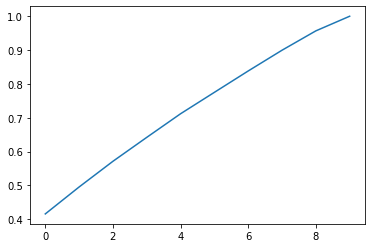

In [6]:
#0,0000000
#adfs,1234523
#afd,9420
pca = PCA(n_components=10)
pca.fit(predictors)
xpca = pca.transform(predictors)
#principalComponents = pca.fit_transform(clf)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['T1P1LP', 'T1P2LP','T1P3LP','T1P4LP','T1P5LP','T2P1LP','T2P2LP','T2P3LP','T2P4LP','T2P5LP'])
#finalDf = pd.concat([principalDf, response], axis = 1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

